In [1]:
# check for poly and mono substance..
# most of the tweet Ids seems to be wrong so need to check code for user timeline ..maybe getting retweetid or somethin..notr sure

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import ast
import pandas as pd
import tweepy
import networkx as nx
import pickle

In [3]:
# now will check the relationship of all node with the source node, does it have folower or following rel.
def create_retweet_edges(apis,source_node,user_list):
    G = nx.DiGraph() # will add edges directly
    # users type(int)
    first_nodes = list()
    for user in tqdm(user_list):
        apis.rotate(-1)
        api = apis[0]
        if (user != source_node):
            try:
                relation_obj = api.show_friendship(source_id = (source_node), target_id = (user))[0]
                if ((relation_obj.following == True) or (relation_obj.followed_by == True)):
                    if user not in first_nodes:
                        first_nodes.append(user)
                    if (relation_obj.following == True):
                        G.add_edge(source_node,user)
                    if (relation_obj.followed_by == True):
                        G.add_edge(user,source_node)
            except tweepy.TweepError as e:
                continue
    return(G,first_nodes)

In [4]:
# return the dataframe @type= <following,follower>
def find_connections(apis,user_list,typef='following'):
    df = pd.DataFrame()
    print("finding connection for "+ typef + " network might take some time\n")
    for user in tqdm(user_list):
        apis.rotate(1)
        api = apis[0]
        try:
            if typef == 'following':
                following = (api.followers_ids(user))  # return list of followers
                data = {
                        'userID':user,
                        'following_list':following
                }
            elif typef == 'followers':
                friends = (api.friends_ids(user))  # return list of following
                data = {
                        'userID':user,
                        'followers_list':friends
                }
            else:
                print("wrong type specified")
            df = df.append(data,ignore_index=True)
        except tweepy.TweepError as e:
            continue
    return df

In [5]:
pd.set_option('display.max_colwidth', -1)

In [6]:
# getting the remaining users for level 2
df_user= pd.read_csv("/home/akshayuppal3/hexagonData.csv",lineterminator="\n")

In [7]:
# lets check the cascades for other substances like weed, marijuana etc
df_timeline = pd.read_csv("/home/akshayuppal3/userTimelineData.csv",lineterminator="\n")

In [8]:
weed_words = pd.read_excel("/home/akshayuppal3/weed_words.xlsx",header=None)
weed_words.columns = ['weedID']

In [9]:
weed_list = list(weed_words.weedID)

In [10]:
# weed word not present in the list
weed_list[3] = 'weed'
weed_list.remove(weed_list[4])

In [11]:
# introduce padding
weed_list = [(' '+ word + ' ' ) for word in weed_list]

In [12]:
pattern_mari = '|'.join(weed_list[:20])

In [105]:
### finding all of the tweets that have retweet in the similar range(100-1000)
df_temp = df_timeline[df_timeline['retweetCount'].between(100,1000)]

In [106]:
## get all the tweets that have any occurance of the weed words
df_weeds = df_temp[df_temp['tweetText'].str.contains(pattern_mari,case= False)]

In [107]:
len(df_weeds.userID.unique())

311

In [108]:
df_retweets = pd.DataFrame({'retweets':list(df_weeds['retweetCount']),
                            'tweetId':list(df_weeds['tweetId']),
                            'userID': list(df_weeds['userID'])}
                          )

In [109]:
df_ret = df_retweets.groupby('userID')['retweets'].max()

In [110]:
df_ret = df_ret.reset_index()
df_ret = pd.DataFrame(df_ret)

In [111]:
df_retf = df_ret.groupby('retweets')['userID'].agg({'count':'count'})
df_retf = df_retf.reset_index()

In [112]:
df_retf = df_retf.sort('count')

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


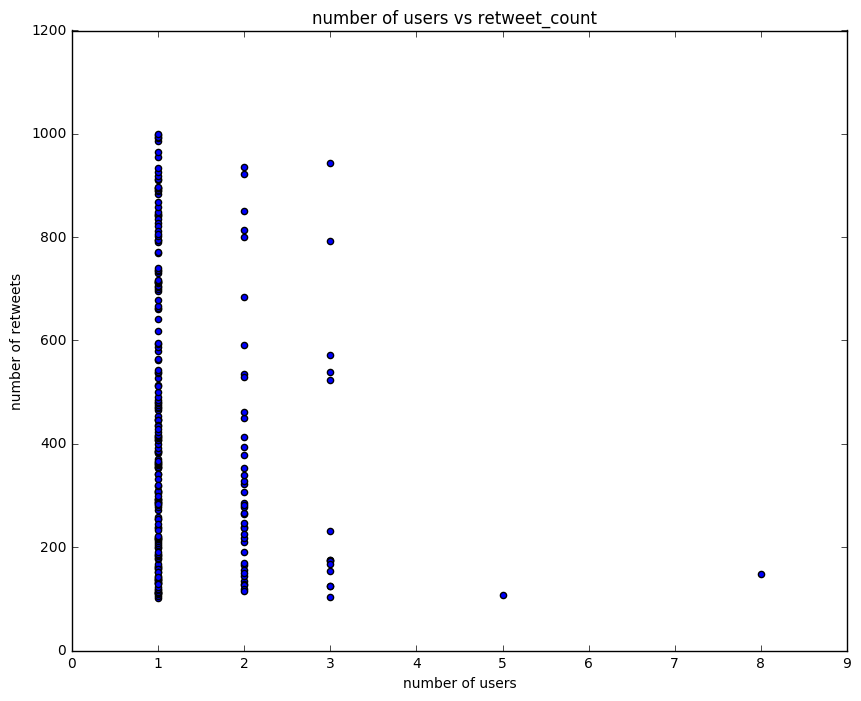

In [113]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(list(df_retf['count'][0:]),list(df_retf.retweets[0:]))
plt.title("number of users vs retweet_count  ")
plt.xlabel("number of users")
plt.ylabel("number of retweets")
plt.show()

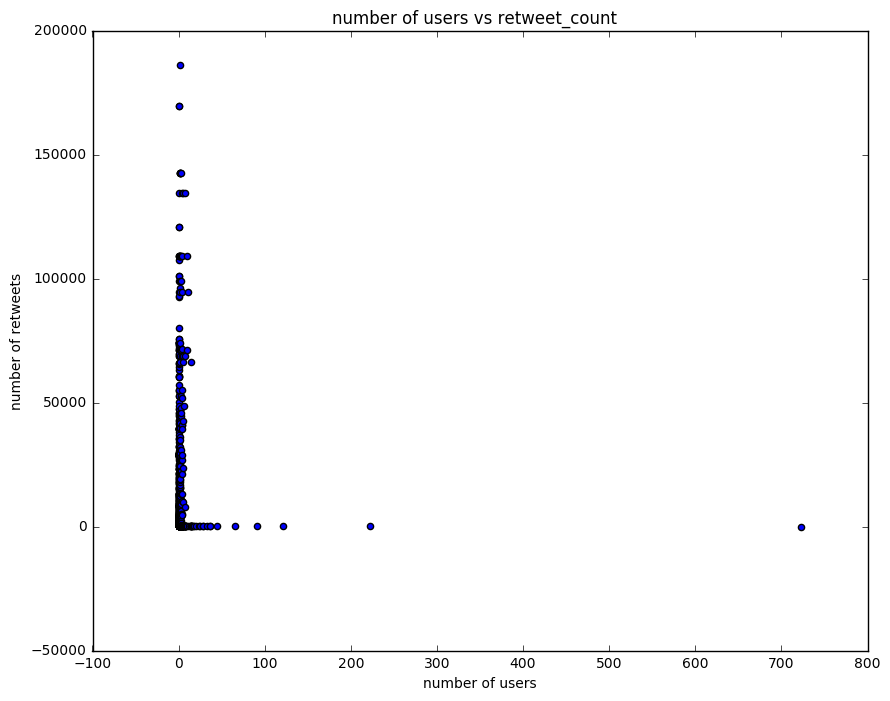

In [ ]:
valid_tweets = list()--#Dont run
for idx,row in tqdm(df_weeds.iterrows(),total=len(df_weeds)):
    tweetID = row["tweetId"]
    apis.rotate(1)
    api = apis[0]
    try:
        if( len (valid_tweets) > 10):
            break
        if (len(api.retweeters(tweetID)) > 0):
            valid_tweets.append(tweetID)
    except tweepy.TweepError as e:
        continue

In [ ]:
# so we got some valid ids..that might have non zero retweets
valid_tweets

In [21]:
# some of the tweet ids found based on url
1048722476287623168 # 1049481130288787457# selling weed  ..using first one
1049385934872043525 # 1049507556853510144 #talk about drug..

1049385934872043525

In [58]:
# actual source # 1048722476287623168
df_source = df_weeds.loc[df_weeds.tweetId == 1049481130288787457]

In [62]:
df_source

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
77582,294,None,404,NaN,http://pbs.twimg.com/profile_images/1028331179207012358/4IptB6S2_normal.jpg,en,667,False,2018-10-09 02:06:14,1049481130288787457,I ain't selling weed no more .. This nigga done gave me a Twen😑 https://t.co/hXpyr7wRPF,2014-03-03 02:59:03,FIU || MAF,502,2377877379,"Miramar, FL",Notthefather


In [61]:
df_source.tweetText.values[0]

"I ain't selling weed no more .. This nigga done gave me a Twen😑 https://t.co/hXpyr7wRPF"

In [26]:
df_source.tweetId.values[0]

1049481130288787457

In [28]:
# so our user is not the main source ... but he is part of a chain .. so we will look aty cascade from source
# found the source based on url..label our user as green and source as yellow
api = apis[0]
len(api.retweeters("1049481130288787457"))

0

In [29]:
len(api.retweeters("1048722476287623168"))

90

In [123]:
df_source.retweetCount

77582    667
Name: retweetCount, dtype: int64

In [30]:
# retweets based on https://twren.ch/
df_weed_retweet = pd.read_csv("/home/akshayuppal3/weed_retweets.csv",index_col=0,header=None)

In [122]:
len(df_weed_retweet)

594

In [31]:
df_weed_retweet.columns = ["userID","twitter_name","followers","following","verified"]

In [32]:
df_weed_retweet.reset_index(drop=True,inplace=True)

In [33]:
source_node = 220896945 # user_id of the orginal tweet source

In [34]:
user_list = list(df_weed_retweet.userID)

In [ ]:
# now will check the relationship of all node with the source node, does it have folower or following rel.
# def create_retweet_edges(source_node,user_list,filename):
G = nx.DiGraph() # will add edges directly
# users type(int)
for user in tqdm(user_list):
    apis.rotate(-1)
    api = apis[0]
    if (user != source_node):
        try:
            relation_obj = api.show_friendship(source_id = (source_node), target_id = (user))[0]
            if (relation_obj.following == True):
                G.add_edge(source_node,user)
            if (relation_obj.followed_by == True):
                G.add_edge(user,source_node)
        except tweepy.TweepError as e:
            print(e.response.text)
            continue
# return(G)
import pickle
pickle.dump(G, open('graph_temp.pkl', 'wb'))

 89%|████████▉ | 531/594 [01:44<00:12,  5.07it/s]

In [35]:
G = pickle.load(open("graph_temp.pkl","rb"))

In [319]:
color_map = list()
for node in G.nodes():
    if node == source_node:
        color_map.append("yellow")
    else:
        color_map.append("green")

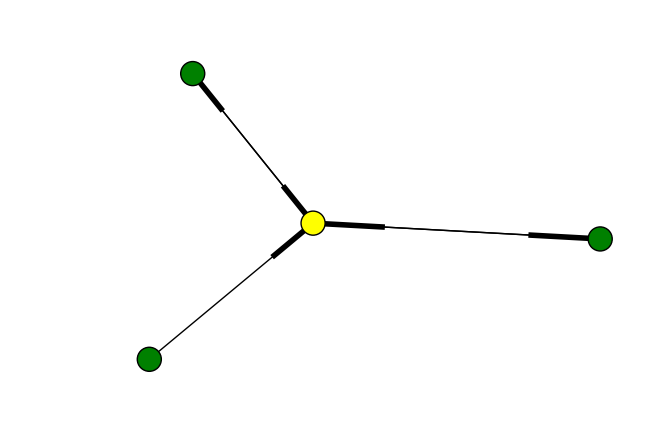

In [320]:
## 1st level graph based on 594 users
# yellow specify the source
nx.draw(G,node_color=color_map)
plt.show()

In [36]:
# even the user in the data is not part of the 1st level cascade
df_source.userID.values[0] in G.nodes()

False

In [47]:
if(len(G.edges()) < len(user_list)):
    print("we require 2nd level")
first_nodes = list(set(G.nodes()) - set([source_node]))

we require 2nd level


In [49]:
# G,first_nodes = create_retweet_edges(apis,source_node,user_list)
if (len(first_nodes) < len(user_list)):
    rem_users = list(set(user_list) - set(first_nodes))
    second_user = list()
    # find both the following and follower relationship
    df_following = find_connections(apis,first_nodes,'following')
    df_followers = find_connections(apis,first_nodes,'followers')
    for node in tqdm(first_nodes):
        for user in rem_users:
            followers = (df_following.following_list[df_following.userID == node].values[0])
            following = (df_followers.followers_list[df_followers.userID == node].values[0])        
            if ((user in set(followers)) or (user in set(following))):
                if (user not in second_user):
                    second_user.append(user)
                if (user in set(followers)):
                    G.add_edge(user,node)
                if user in set(following):
                    G.add_edge(node,user)
with open('graph_temp.pkl', 'wb') as handle:
    pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

# and then we get the final 2nd level graph

  0%|          | 0/3 [00:00<?, ?it/s]

finding connection for following network might take some time



 33%|███▎      | 1/3 [00:00<00:00,  5.71it/s]

finding connection for followers network might take some time



100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


In [50]:
G = pickle.load(open("graph_temp.pkl","rb"))

In [51]:
shells =  [[source_node]] + [first_nodes] + [second_user]
pos = nx.shell_layout(G,shells)

In [52]:
color_map = list()
for node in pos.keys():
    if node == source_node:
        color_map.append("yellow")
    else:
        if node in set(first_nodes):
            color_map.append("green")
        elif node in set(second_user):
            color_map.append("pink")

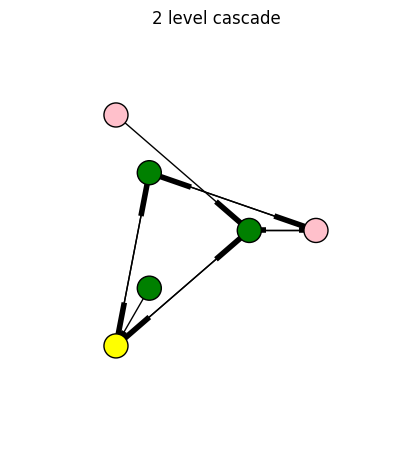

In [397]:
# weed propagation for 2lvl cascades
nx.draw(G,nodelist=pos.keys(),pos=pos,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

In [56]:
G.nodes()

[220896945, 547662904, 2975052792, 603834332, 457977052, 91691742]

In [57]:
df_source.tweetId.values[0]

1049481130288787457

In [55]:
df_source.tweetId.values[0] in G.nodes()

False

In [199]:
len(api.retweets("1048722476287623168"))

19

### testing

In [42]:
from authentication import Authenticate
from collections import deque
ob = Authenticate()
apis = ob.api
apis = deque(apis)

In [43]:
len(apis)

9